#  Classification

**Author:**
[Anthony Strittmatter](http://www.anthonystrittmatter.com)

We have data on voter turnout of the 2002 house of representative election. The outcome variable *vote02* is a binary indicator: 1 indicates participation and 0 non-participation in the 2002 election. We want to predict who participates in the election based on the characteristics age, gender, and previous participation in the 1998 and 2000 elections.

## Load Packages and Data

In [8]:
########################  Load Packages and Data  ########################

# Load packages
library(rpart)
library(rpart.plot)
library(neuralnet)

# Load data
voters <- read.csv("voters02.csv", sep = ",")

print('Packages and data successfully loaded.')

#############################################################################

[1] "Packages and data successfully loaded."


## Inspect Data

In [9]:
########################  Describe Data  ########################

# Print first few rows of old data
head(voters)

# Number of observations
print(paste0('Old data: ',nrow(voters),' observations'))

######################################################################

vote02,age,female,vote00,vote98
1,43,1,1,0
1,33,1,1,0
1,37,0,1,0
0,41,0,1,0
1,45,0,0,0
0,49,1,0,0


[1] "Old data: 3000 observations"


## Generate Training and Test Sample

In [10]:
########################  Training and Test Samples  ########################

set.seed(1001)

# Generate variable with the rows in training data
size <- floor(0.5 * nrow(voters))
training_set <- sample(seq_len(nrow(voters)), size = size)

print('Training and test samples created.')

#############################################################################

[1] "Training and test samples created."


## ClassificationTree

[1] "Error Rate Tree: 0.252"


png 
  3

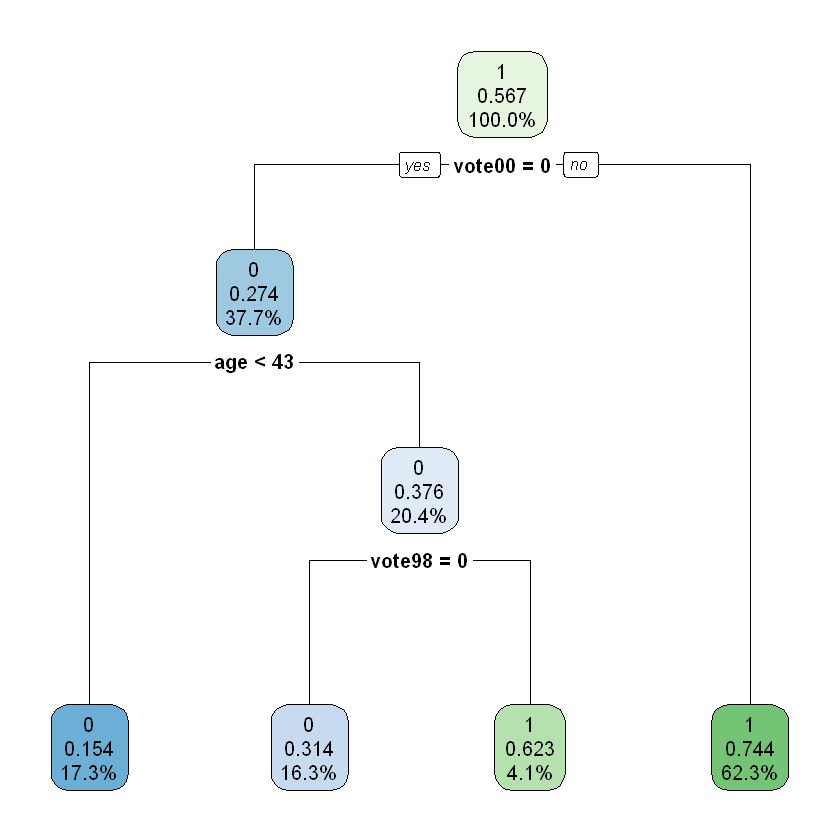

In [15]:
######################  Classification Tree  #######################

set.seed(27112019)

# Classification Tree
deep_tree <- rpart(formula = vote02 ~ ., data = voters[training_set,], method = "class",
                xval = 10, y = TRUE, control = rpart.control(cp = 0.00002, minbucket=15))
# Uses Gini index instead of MSE as model accuracy measure

# Optimal tree size
op.index <- which.min(deep_tree$cptable[, "xerror"])

## Select the Tree that Minimises CV-MSE
cp.vals <- deep_tree$cptable[op.index, "CP"]

# Prune the deep tree
pruned_tree <- prune(deep_tree, cp = cp.vals)

## Plot tree structure
rpart.plot(pruned_tree,digits=3)

# Fitted values
predtree <- predict(pruned_tree, newdata= voters)
pred_vote_tree <- (predtree[,2] > 0.5 )

# Calculate the Error Rate
error_rate_tree <- round(mean((voters[-training_set,1] != pred_vote_tree[-training_set])), digits = 4)

print(paste0("Error Rate Tree: ", error_rate_tree))

################################################################

## Neural Network

In [21]:
########################  Neural Net  #######################

set.seed(27112019)

replication = 1 # number of replications
neurons = c(3)

nnet <- neuralnet(formula = vote02 ~., data = voters[training_set,], hidden = neurons, 
                 act.fct = "logistic", rep= replication, linear.output = FALSE)

plot(nnet)

# Fitted values
prednet <- predict(nnet, newdata=voters)
pred_vote_net <- (prednet > 0.5 )

# Calculate the Error Rate
error_rate_net <- round(mean((voters[-training_set,1] != pred_vote_net[-training_set])), digits = 4)

print(paste0("Error Rate Neural Net: ", error_rate_net))

################################################################

[1] "Error Rate Neural Net: 0.2493"
